<h1><center>Determinants of a Mobile Strategy Game's Success</center></h1>
<body><center>Anna Carandang, Jacqueline Gao, and Mahreen Haider</center></body>

# Table of Contents
1. Introduction
2. Data Collection
3. Data Processing
4. Exploratory Analysis and Data Visualization
5. Analysis, Hypothesis Testing, and Machine Learning
6. Insight and Policy Decision

# 1. Introduction

The global mobile gaming market is thriving, with some of its most popular apps raking in billions of dollars in revenue. Some of these heavyweights include Clash of Clans, PUBG Mobile, Plants vs. Zombies, Pokemon Go, and Agari.io. Companies are investing vast amounts of money into the development of such games. However, in such a competitive and ever-growing market, it can be difficult for an app to prosper.

In this tutorial, we will examine numerous factors to see if they can be used as a predictor of a mobile strategy game's success. The dataset we will be using is the data of 17007 strategy games on the Apple App Store, collected from [Kaggle](https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games). For the purposes of this tutorial, we will associate success with the average user rating value.

# 2. Data Collection

This step of the data life cycle focuses on gathering data from different sources, such as websites or files. We start by importing the required tools and libraries. Additional information on how to upgrade from pip to pip3 and use it to install the required packages can be found [here](https://help.dreamhost.com/hc/en-us/articles/115000699011-Using-pip3-to-install-Python3-modules). We will use Python 3 for this data anaysis along with some libraries such as [pandas](https://pandas.pydata.org/pandas-docs/stable/),[numpy](https://docs.scipy.org/doc/numpy/user/),[scikit-learn](https://scikit-learn.org/stable/index.html),[matplotlib](https://matplotlib.org/contents.html), etc. We're using pip3 because it is used to install packages for Python 3, which is used in this tutorial.

Additional reading (2. Data Mining): https://towardsdatascience.com/data-science-life-cycle-101-for-dummies-like-me-e66b47ad8d8f

In [1]:
# Imports required tools and libraries
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Dataset Source

Here, we utilize the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to read the CSV (comma-separated values) file obtained from [Kaggle](https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games). The dataset contains details about mobile games including factors like player age, price, average user ratings, languages, etc. We will place the data into a DataFrame called games for later processing and analysis. We print out the first few rows of the resulting DataFrame.

The dataset may be updated in the future, so if you're interested, you can obtain the version of the dataset that we have used [here](https://github.com/jacquelinegao/jacquelinegao.github.io/blob/master/appstore_games.csv).

Special thanks to tristan581 for providing us with the data! 

In [2]:
# Reads CSV file
games = pd.read_csv("appstore_games.csv")

# Prints first five rows of DataFrame
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


# 3. Data Processing
This step of the data cycle focuses on cleaning or tidying the data to make it readable and prepare it for analysis. We start by removing duplicates from our dataset, as determined by ID numbers. We will print out the total number of DataFrame entries (rows), followed by the number of unique values. This confirms that there are 160 duplicates which need to be removed before proceeding. We remove the duplicates with the [drop_duplicates](https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/) function and print the length of the DataFrame again to verify that our cleaning was successful.

In [3]:
# Checks for duplicates (games with the same ID number)
print("Total entries:", len(games))
print("Unique values:", len(games['ID'].unique()))

# DataFrame with duplicates removed
games = games.drop_duplicates(['ID'])
print("Values after cleaning:", len(games))

Total entries: 17007
Unique values: 16847
Values after cleaning: 16847


The dataset currently contains 18 columns. We drop the Icon URL, URL, ID, Subtitle, Size, Original Release data, and Current Version Release Date columns from the DataFrame because we are not going to use these values. Then, we rename the columns to remove the whitespaces and the hyphen from "In-app Purchases" because they can (and often do) cause errors.

Then, we remove rows with missing values in the AverageUserRatings and/or UserRatingCount columns with the [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function. Unfortunately, this removes much of our dataset, leaving us with only 7561 entries. We considered imputing the missing data instead of dropping the rows but couldn't, because both AverageUserRating and UserRatingCount were missing in all cases. Further reading on missing data can be found [here](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).

In [4]:
# Drops unused columns
games.drop(['Icon URL', 'URL','ID','Subtitle','Size','Original Release Date','Current Version Release Date'], axis=1, inplace=True)

# Renames columns to remove whitespace
games = games.rename(columns = {'Average User Rating': 'AverageUserRating', 'User Rating Count': 'UserRatingCount', \
                                'In-app Purchases': 'InAppPurchases', 'Age Rating': 'AgeRating', \
                                'Primary Genre': 'PrimaryGenre'})

# Drop rows with missing AverageUserRating and/or UserRatingCount value(s)
games = games.dropna(subset=['AverageUserRating', 'UserRatingCount'])   

print(len(games))

7488


Next, we standardize the 0 values in the Price column to 0.00 and convert the type of the InAppPurchases column from object to string for later use. Finally, we print out the first five rows of the new DataFrame. 

Now, we're ready to analyze and visualize our data!

In [5]:
# Standardizes 0 values in Price to 0.00
games.loc[games['Price'] == 0, 'Price'] = 0.00
games.loc[games['Price'] == 0.0, 'Price'] = 0.00

# Changes type of the InAppPurchases column from object to string
games["InAppPurchases"] = games.InAppPurchases.astype(str)

# Prints first five rows of DataFrame
games.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,PrimaryGenre,Genres
0,Sudoku,4.0,3553.0,2.99,nan,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,"Games, Strategy, Puzzle"
1,Reversi,3.5,284.0,1.99,nan,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,Games,"Games, Strategy, Board"
2,Morocco,3.0,8376.0,0.00,nan,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,Games,"Games, Board, Strategy"
3,Sudoku (Free),3.5,190394.0,0.00,nan,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,"Games, Strategy, Puzzle"
4,Senet Deluxe,3.5,28.0,2.99,nan,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",Games,"Games, Strategy, Board, Education"


# 4. Exploratory Analysis and Data Visualization

This step of the data cycle is where the actual data analysis happens. We mostly focus on finding the correlation between the cost of a game and its success rate.

We start by dividing the games into four different categories: completely free games, free games with in-app purchases (aka microtransactions), paid games without microtransactions, and paid games with microtransactions.

## Completely Free Games

In [6]:
free_games = games.copy(deep=True)

# Drops rows with paid games
free_games = free_games[free_games.Price == 0.00]
# Drops rows with in-app purchases
free_games = free_games[free_games.InAppPurchases == 'nan']

free_games.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,PrimaryGenre,Genres
2,Morocco,3.0,8376.0,0.0,nan,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,Games,"Games, Board, Strategy"
3,Sudoku (Free),3.5,190394.0,0.0,nan,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,"Games, Strategy, Puzzle"
6,Gravitation,2.5,35.0,0.0,nan,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,Games,"Games, Entertainment, Puzzle, Strategy"
8,Carte,2.5,44.0,0.0,nan,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,Games,"Games, Strategy, Board, Entertainment"
9,"""Barrels O' Fun""",2.5,184.0,0.0,nan,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,Games,"Games, Casual, Strategy"


## Free Games with In-App Purchases (aka microtransactions)

In [7]:
free_and_microtransactions = games.copy(deep=True)

# Drops rows with paid games
free_and_microtransactions = free_and_microtransactions[free_and_microtransactions.Price == 0.00]
# Drops rows without in-app purchases
free_and_microtransactions = free_and_microtransactions[free_and_microtransactions.InAppPurchases != 'nan']

free_and_microtransactions.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,PrimaryGenre,Genres
5,Sudoku - Classic number puzzle,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,Games,"Games, Entertainment, Strategy, Puzzle"
15,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",Games,"Games, Strategy, Board"
18,Catcha Mouse,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,"Meme, Inc",4+,EN,Games,"Games, Puzzle, Strategy"
19,"Cool Sudoku, Jigsaw, Killer",3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,Games,"Games, Strategy, Puzzle, Entertainment"
31,Edgewise,3.5,23.0,0.0,"1.99, 0.99","""Edgewise is a solitaire card game that's easy...",Greggy Bits Software,4+,EN,Games,"Games, Card, Strategy"


## Paid Games without Microtransactions

In [8]:
paid_games = games.copy(deep=True)

# Drops rows with free games
paid_games = paid_games[paid_games.Price != 0.00]
# Drops rows with in-app purchases
paid_games = paid_games[paid_games.InAppPurchases == 'nan']

paid_games.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,PrimaryGenre,Genres
0,Sudoku,4.0,3553.0,2.99,nan,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,"Games, Strategy, Puzzle"
1,Reversi,3.5,284.0,1.99,nan,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,Games,"Games, Strategy, Board"
4,Senet Deluxe,3.5,28.0,2.99,nan,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",Games,"Games, Strategy, Board, Education"
7,Colony,2.5,125.0,0.99,nan,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,Games,"Games, Strategy, Board"
13,Marple,3.5,989.0,0.99,nan,"AWARDED ""BEST PUZZLER"" IN MACWORLD\'S ""THE BES...",Mikko Kankainen,4+,EN,Games,"Games, Puzzle, Strategy"


## Paid Games with Microtransactions

In [9]:
paid_and_microtransactions = games.copy(deep=True)

# Drops rows with free games
paid_and_microtransactions = paid_and_microtransactions[paid_and_microtransactions.Price != 0.00]
# Drops rows without in-app purchases
paid_and_microtransactions = paid_and_microtransactions[paid_and_microtransactions.InAppPurchases != 'nan']

paid_and_microtransactions.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,PrimaryGenre,Genres
26,Fieldrunners,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",OVERVIEW\n\nThe invasion begins! Pint sized s...,"Subatomic Studios, LLC",9+,EN,Games,"Games, Entertainment, Action, Strategy"
59,Wedding Dash Deluxe,4.5,17056.0,0.99,"0.0, 0.99, 5.99, 0.99, 0.99, 0.99, 0.99, 0.99,...",* Play the most romantic Dash game! With over ...,Glu Games Inc,4+,EN,Games,"Games, Strategy, Action, Entertainment"
70,Slay,3.0,4885.0,3.99,"9.99, 9.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99...",Slay is a simple to learn game of strategy and...,"""Sean O'Connor""",9+,EN,Games,"Games, Board, Strategy"
91,Pocket Tanks Deluxe,4.5,5543.0,4.99,"0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99...","""The Ultimate One-on-One Artillery Game"" \u201...","Blitwise Productions, LLC",9+,EN,Games,"Games, Family, Strategy, Entertainment"
102,Boxed In,3.5,93235.0,0.99,"0.99, 0.99, 0.99, 1.99, 0.99, 2.99, 4.99, 0.99...",Ready to try one of the best puzzle games in t...,Dennis Mengelt,4+,EN,Games,"Games, Strategy, Entertainment, Puzzle"


## Price vs. AverageUserRating

Now that we have sorted the games by their pricing structure, we can take a look at how each type fares in regards to their average user ratings. We do this by creating a new DataFrame and counting the number of occurrences of each average user rating value. We also clean the DataFrame as we go, as shown below.

In [10]:
# Creates an empty DataFrame
ratings = pd.DataFrame()

ratings['TotalRatings'] = games['AverageUserRating'].value_counts()
ratings['FreeGames'] = free_games['AverageUserRating'].value_counts()
ratings['FreeandMicro'] = free_and_microtransactions['AverageUserRating'].value_counts()
ratings['PaidGames'] = paid_games['AverageUserRating'].value_counts()
ratings['PaidandMicro'] = paid_and_microtransactions['AverageUserRating'].value_counts()

# Changes NaN value to 0.0
ratings.at[1.0, 'FreeandMicro'] = 0.0

# Changes all ratings to int for consistency
ratings = ratings.astype(int)

# Moves current index of AverageUserRating to a DataFrame column and converts it to a string
ratings['AverageUserRating'] = ratings.index

# Reorders the rows by descending AverageUserRating
ratings.sort_values('AverageUserRating', axis=0, ascending=False, inplace=True, kind='quicksort')

# Resets the index
ratings.reset_index(drop=True, inplace=True)

# Reorders DataFrame columns
ratings = ratings[['AverageUserRating','TotalRatings','FreeGames','FreeandMicro','PaidGames','PaidandMicro']]

ratings

,AverageUserRating,TotalRatings,FreeGames,FreeandMicro,PaidGames,PaidandMicro
0,5.0,984,319,527,100,38
1,4.5,2832,526,1872,279,155
2,4.0,1707,458,942,201,106
3,3.5,916,320,435,117,44
4,3.0,507,194,227,71,15
5,2.5,313,141,124,37,11
6,2.0,157,72,63,17,5
7,1.5,59,24,21,12,2
8,1.0,13,4,0,7,2


This DataFrame looks pretty good, but there's one problem with it: the data isn't standardized. We need to convert all of these counts into ratios. Since we already separated all of these game categories into DataFrames earlier, we can make use of the len function. We can also remove the total ratings column since it's no longer necessary.

In [11]:
# Converts counts into ratios
ratings['FreeGames'] = ratings['FreeGames'] / (len(free_games)) * 100
ratings['FreeandMicro'] = ratings['FreeandMicro'] / (len(free_and_microtransactions)) * 100
ratings['PaidGames'] = ratings['PaidGames'] / (len(paid_games)) * 100
ratings['PaidandMicro'] = ratings['PaidandMicro'] / (len(paid_and_microtransactions)) * 100

# Removes total ratings column
ratings = ratings[['AverageUserRating','FreeGames','FreeandMicro','PaidGames','PaidandMicro']]

ratings

,AverageUserRating,FreeGames,FreeandMicro,PaidGames,PaidandMicro
0,5.0,15.500486,12.514842,11.890606,10.052910
1,4.5,25.558795,44.454999,33.174792,41.005291
2,4.0,22.254616,22.369983,23.900119,28.042328
3,3.5,15.549077,10.330088,13.912010,11.640212
4,3.0,9.426628,5.390644,8.442331,3.968254
5,2.5,6.851312,2.944669,4.399524,2.910053
6,2.0,3.498542,1.496082,2.021403,1.322751
7,1.5,1.166181,0.498694,1.426873,0.529101
8,1.0,0.194363,0.000000,0.832342,0.529101


Now, we can graph this data.

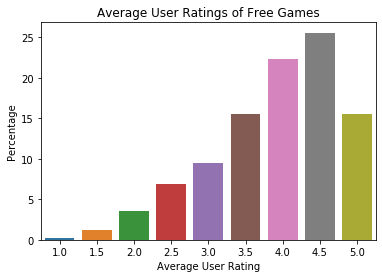

In [12]:
# Creates a bar graph of average user rating frequencies of free games, as a ratio
sns.barplot(x='AverageUserRating', y='FreeGames', data=ratings)

# Creates a title, x, and y labels
plt.title('Average User Ratings of Free Games')
plt.xlabel('Average User Rating')
plt.ylabel('Percentage')

# Displays the plot
plt.show()

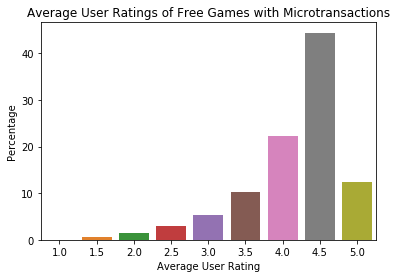

In [13]:
# Creates a bar graph of average user rating frequencies of free games with microtransactions, as a ratio
sns.barplot(x='AverageUserRating', y='FreeandMicro', data=ratings)

# Creates a title, x, and y labels
plt.title('Average User Ratings of Free Games with Microtransactions')
plt.xlabel('Average User Rating')
plt.ylabel('Percentage')

# Displays the plot
plt.show()

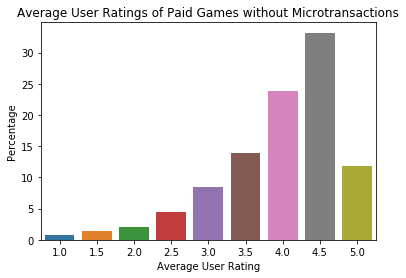

In [14]:
# Creates a bar graph of average user rating frequencies of paid games without microtransactions, as a ratio
sns.barplot(x='AverageUserRating', y='PaidGames', data=ratings)

# Creates a title, x, and y labels
plt.title('Average User Ratings of Paid Games without Microtransactions')
plt.xlabel('Average User Rating')
plt.ylabel('Percentage')

# Displays the plot
plt.show()

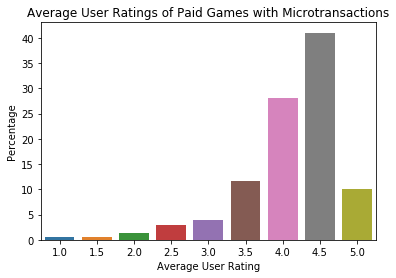

In [15]:
# Creates a bar graph of average user rating frequencies of paid games with microtransactions, as a ratio
sns.barplot(x='AverageUserRating', y='PaidandMicro', data=ratings)

# Creates a title, x, and y labels
plt.title('Average User Ratings of Paid Games with Microtransactions')
plt.xlabel('Average User Rating')
plt.ylabel('Percentage')

# Displays the plot
plt.show()

## Analysis of Price Structure and Average User Rating

## Price Structure vs. Average User Rating

In [22]:
# Concatenates all the previous tables together, adding an additional column to them to signify the original table
# combined = pd.concat([free_games.assign(Dataset='Free'), free_and_microtransactions.assign(Dataset='Free w/ Micro'),\
#                      paid_games.assign(Dataset='Paid'), paid_and_microtransactions.assign(Dataset='Paid w/ Micro')])

# Makes a readable violinplot of average user rating, divided by their dataset category
# plt.figure(figsize=(15, 10))
# sns.set(font_scale=2)
# sns.violinplot(x="Dataset", y="AverageUserRating", data=combined, linewidth=4)#, hue='Dataset',s=100, palette='bright')
# plt.show()

## AgeRating vs. AverageUserRating

In [17]:
age_rating = games.copy(deep=True)

# Drops unnecessary columns
age_rating = age_rating.drop(['Name','UserRatingCount','Price','InAppPurchases','Description','Developer','Languages','PrimaryGenre','Genres'], axis=1)

age_rating = age_rating.groupby('AgeRating', as_index=False).sum()

age_rating

,AgeRating,AverageUserRating
0,12+,5440.0
1,17+,1136.0
2,4+,17878.0
3,9+,5963.0


In [23]:
# games['AgeRating'].unique()

# sns.scatterplot(x='AgeRating', y='Price', data=games)

# test = games[games['Price'] >= 100]
# sns.scatterplot(x='Size', y='AverageUserRating', data=games)

# games['InAppPurchases'].unique()

# games[games['Price'] >= 175]

# for index, group in games.groupby('AgeRating'):
#     print(index)
#     sns.scatterplot(x='Price', y='AverageUserRating', data=group)
#     plt.show()

## Genres vs. AverageUserRating

In [19]:
filtered_genres = games.copy(deep=True)

filtered_genres.Genres = games['Genres'].str.split(',').\
                    apply(lambda x: [s.strip() for s in x if s.strip() != 'Games' and s.strip() != 'Strategy'])

filtered_genres.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,PrimaryGenre,Genres
0,Sudoku,4.0,3553.0,2.99,nan,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,[Puzzle]
1,Reversi,3.5,284.0,1.99,nan,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,Games,[Board]
2,Morocco,3.0,8376.0,0.00,nan,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,Games,[Board]
3,Sudoku (Free),3.5,190394.0,0.00,nan,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,[Puzzle]
4,Senet Deluxe,3.5,28.0,2.99,nan,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",Games,"[Board, Education]"


In [20]:
#pd.melt(filtered_genres, id_vars='Name', value_vars='Genres')
#filtered_genres.applymap(lambda x: x).plot.bar(rot=0, color=list('br')) DONT RUN THIS IT TAKES FOREVER AND GIVES NOTHING


## Supported Languages vs. AverageUserRating

In [21]:
# games['Languages'].unique
# print(len(games['Developer'].unique()))
languages = games.copy(deep=True)

# languages = pd.concat([languages[[0]], languages['Languages'].str.split(',', expand=True)], axis=1)

# 5. Analysis, Hypothesis Testing, and Machine Learning

This step of the data life cycle where we apply modeling techniques to obtain predictive values for our data. In this tutorial, we will apply linear regression, but there are many other regression models available. Further reading material is available on [Towards Data Science](https://towardsdatascience.com/selecting-the-best-machine-learning-algorithm-for-your-regression-problem-20c330bad4ef), [GeeksforGeeks](https://www.geeksforgeeks.org/ml-linear-regression/), and [Medium](https://medium.com/datadriveninvestor/regression-in-machine-learning-296caae933ec).

# 6. Insight and Policy Decision

This step of the data life cycle where we utilize our findings to draw conclusions and make inferences.